In [1]:
# Load all required Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# load data set
df = pd.read_excel("Hospital Readmission Data.xlsx")
df

,PatientID,Age (in years),Gender,AdmissionType,Diagnosis,LengthOfStay (in days),TreatmentReceived,FollowUpSchedule,Readmitted
0,1,65,Male,Emergency,Heart Failure,7,Medication A,Yes,Yes
1,2,50,Female,Elective,Hip Replacement,5,Surgery,Yes,No
2,3,72,Male,Emergency,Pneumonia,10,Antibiotics,No,Yes
3,4,45,Female,Urgent,Appendicitis,3,Surgery,Yes,No
4,5,80,Female,Emergency,Stroke,12,Rehabilitation,Yes,Yes
5,6,60,Male,Elective,Knee Replacement,6,Surgery,No,No
6,7,55,Male,Urgent,Diabetes,4,Insulin,Yes,No
7,8,67,Female,Emergency,COPD,8,Medication B,Yes,Yes
8,9,30,Male,Elective,Tonsillectomy,2,Surgery,No,No
9,10,77,Female,Emergency,Fracture,9,Cast,Yes,Yes


# Basic operation on a data frame

In [3]:
# check of dataset dimensionality
df.shape

(10, 9)

In [4]:
# Check information of a data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PatientID               10 non-null     int64 
 1   Age (in years)          10 non-null     int64 
 2   Gender                  10 non-null     object
 3   AdmissionType           10 non-null     object
 4   Diagnosis               10 non-null     object
 5   LengthOfStay (in days)  10 non-null     int64 
 6   TreatmentReceived       10 non-null     object
 7   FollowUpSchedule        10 non-null     object
 8   Readmitted              10 non-null     object
dtypes: int64(3), object(6)
memory usage: 852.0+ bytes


In [5]:
# To Check null values in numerical
df.isnull().sum()

PatientID                 0
Age (in years)            0
Gender                    0
AdmissionType             0
Diagnosis                 0
LengthOfStay (in days)    0
TreatmentReceived         0
FollowUpSchedule          0
Readmitted                0
dtype: int64

In [6]:
# Using describe to find descriptive statistics provides the central tendency, dispersion, and shape of data set distribution
df.describe()

,PatientID,Age (in years),LengthOfStay (in days)
count,10.00000,10.000000,10.000000
mean,5.50000,60.100000,6.600000
std,3.02765,15.480812,3.204164
min,1.00000,30.000000,2.000000
25%,3.25000,51.250000,4.250000
50%,5.50000,62.500000,6.500000
75%,7.75000,70.750000,8.750000
max,10.00000,80.000000,12.000000


# Data Analysis

# 1. Descriptive Statistics

In [7]:
# using modular coding find mean, mode 
# Define functions
def calculate_mean(df, col):
    return stat.mean(df[col])

def calculate_mode(df, col):
    return stat.mode(df[col])

age_mean = calculate_mean(df, 'Age (in years)')
length_of_stay_mean = calculate_mean(df, 'LengthOfStay (in days)')

age_mode = calculate_mode(df, 'Age (in years)')
length_of_stay_mode = calculate_mode(df, 'LengthOfStay (in days)')

print(f"Mean Age: {age_mean}")
print(f"Mean Length of Stay: {length_of_stay_mean}")
print(f"Mode Age: {age_mode}")
print(f"Mode Length of Stay: {length_of_stay_mode}")

Mean Age: 60.1
Mean Length of Stay: 6.6
Mode Age: 65
Mode Length of Stay: 7


In [8]:
# remove space from Gender columns
df['Gender'] = df['Gender'].str.strip()

In [9]:
# Define functions modular coding
def calculate_distribution(df, col):
    return df[col].value_counts()

gender_distribution = calculate_distribution(df, 'Gender')
admissiontype_distribution = calculate_distribution(df, 'AdmissionType')
diagnosis_distribution = calculate_distribution(df, 'Diagnosis')

print(f"Gender Distribution: {gender_distribution}")
print(f"Admission Type Distribution: {admissiontype_distribution}")
print(f"Diagnosis Distribution: {diagnosis_distribution}")

Gender Distribution: Gender
Male      5
Female    5
Name: count, dtype: int64
Admission Type Distribution: AdmissionType
Emergency    5
Elective     3
Urgent       2
Name: count, dtype: int64
Diagnosis Distribution: Diagnosis
Heart Failure       1
Hip Replacement     1
Pneumonia           1
Appendicitis        1
Stroke              1
Knee Replacement    1
Diabetes            1
COPD                1
Tonsillectomy       1
Fracture            1
Name: count, dtype: int64


In [10]:
# Compute the readmission rate (percentage of patients readmitted within 30 days)
# find readmitted patients
readmitted_patients = df['Readmitted'].value_counts().get('Yes', 0)
# count the no. of patient
total_number_of_patients = df['PatientID'].count()
# percentage of patient readmitted
percentage_of_patients_readmitted = (readmitted_patients/total_number_of_patients)*100
percentage_of_patients_readmitted

50.0

# 2. Correlation Analysis

In [11]:
# 1. correlation matrix
df2 = df[["PatientID", "Age (in years)", "LengthOfStay (in days)"]]
correlation_matrix = df2.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        PatientID  Age (in years)  LengthOfStay (in days)
PatientID                1.000000       -0.055709               -0.091628
Age (in years)          -0.055709        1.000000                0.946178
LengthOfStay (in days)  -0.091628        0.946178                1.000000


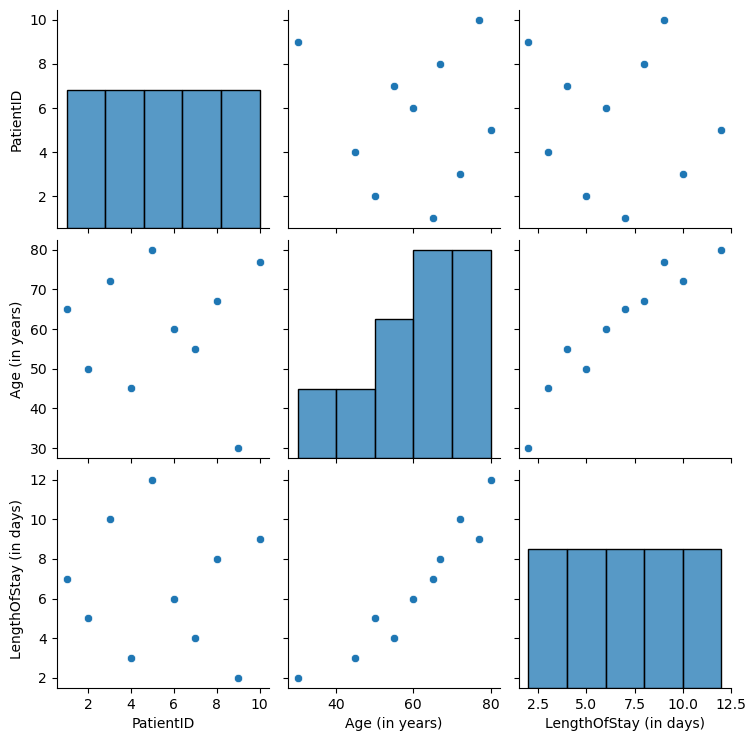

In [12]:
# 2. Pairplot
sns.pairplot(df)
plt.show()

In [13]:
# Apply Label hot encoding on a data set
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Gender', 'AdmissionType', 'Diagnosis', 'TreatmentReceived', 'FollowUpSchedule', 'Readmitted' ]
# Apply Label encoding to each categorical column
for columns in categorical_columns:
    df[columns] = le.fit_transform(df[columns])

In [14]:
df.head(3)

,PatientID,Age (in years),Gender,AdmissionType,Diagnosis,LengthOfStay (in days),TreatmentReceived,FollowUpSchedule,Readmitted
0,1,65,1,1,4,7,3,1,1
1,2,50,0,0,5,5,6,1,0
2,3,72,1,1,7,10,0,0,1


# Model Building

In [15]:
# data separation
X = df.drop('Readmitted',axis=1)
y = df['Readmitted']

In [16]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Step 1: Model Selection
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
}

# Step 2: Model Training and Evaluation

def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    cm = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, cm
    
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
   # return accuracy, precision, recall, f1, cm

    accuracy, precision, recall, f1, cm = evaluate_classification_model(y_test, y_test_pred)
    accuracy, precision, recall, f1, cm = evaluate_classification_model(y_train,y_train_pred)
    
    print(list(models.keys())[i])
   
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix: \n{cm}")
    print('*'*20)
    print('\n')

Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[3 0]
 [0 5]]
********************


Decision Tree Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[3 0]
 [0 5]]
********************


Random Forest Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[3 0]
 [0 5]]
********************




# Logistic Regression

In [18]:
lo_model = LogisticRegression()
lo_model = lo_model.fit(X_train,y_train)
y_pred = lo_model.predict(X_test)
score = lo_model.score(X_test,y_test)
print(f"Predictions: {y_pred}")
print(f"Score: {score}")

Predictions: [0 0]
Score: 1.0


Chi-square statistic: 10.0
P-value: 0.006737946999085468


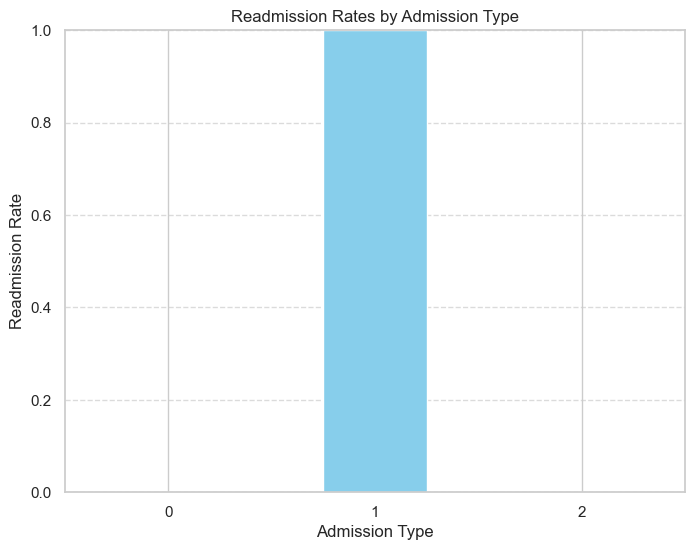

In [34]:
readmission_rates = df.groupby('AdmissionType')['Readmitted'].mean()
# Create a contingency table
contingency_table = pd.crosstab(df['AdmissionType'], df['Readmitted'])

# Perform a chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

plt.figure(figsize=(8, 6))
readmission_rates.plot(kind='bar', color='skyblue')
plt.title('Readmission Rates by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Data Visualization

([0, 1, 2], [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

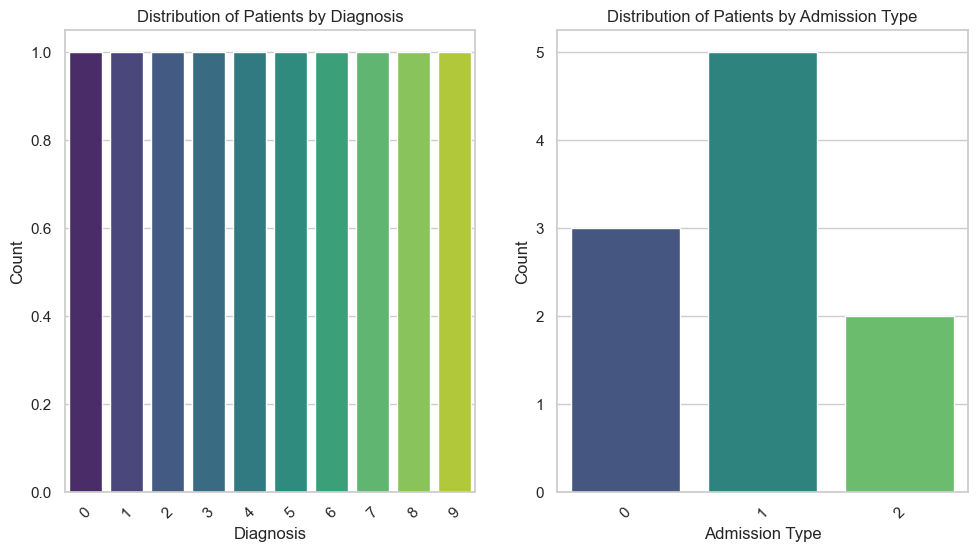

In [20]:
# 1. Bar Charts and Histograms
# 1). Create bar charts to show the distribution of patients by Diagnosis, AdmissionType, and TreatmentReceived. 
# Set the plot style
sns.set(style="whitegrid")

# Create bar charts
plt.figure(figsize=(18, 6))

# Bar chart for Diagnosis
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Diagnosis',palette='viridis')
plt.title('Distribution of Patients by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45) 

# Bar chart for AdmissionType
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='AdmissionType',palette='viridis')
plt.title('Distribution of Patients by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 

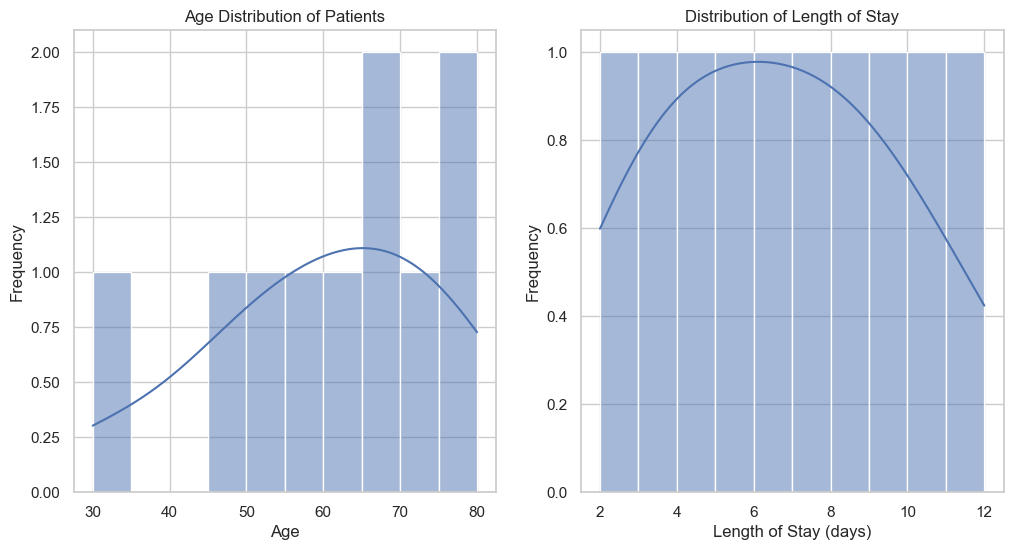

In [21]:
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age (in years)'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for LengthOfStay
plt.subplot(1, 2, 2)
sns.histplot(df['LengthOfStay (in days)'], bins=10, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

# 2. Pie Charts

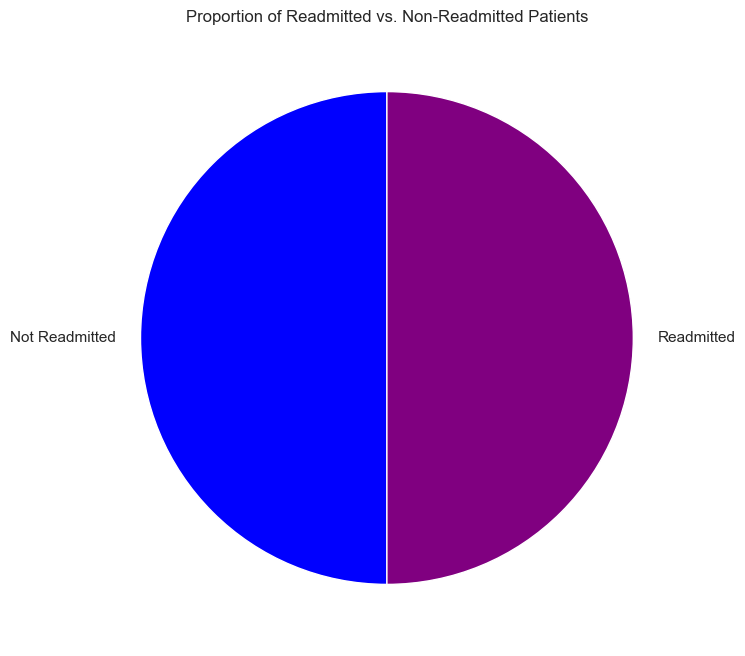

In [22]:
# Create a pie chart for the readmission proportion

readmission_counts = df['Readmitted'].value_counts()
labels = ['Not Readmitted', 'Readmitted']

plt.figure(figsize=(8, 8))
plt.pie(readmission_counts, labels=labels,startangle=90, colors=['blue', 'purple'])
plt.title('Proportion of Readmitted vs. Non-Readmitted Patients')
plt.show()

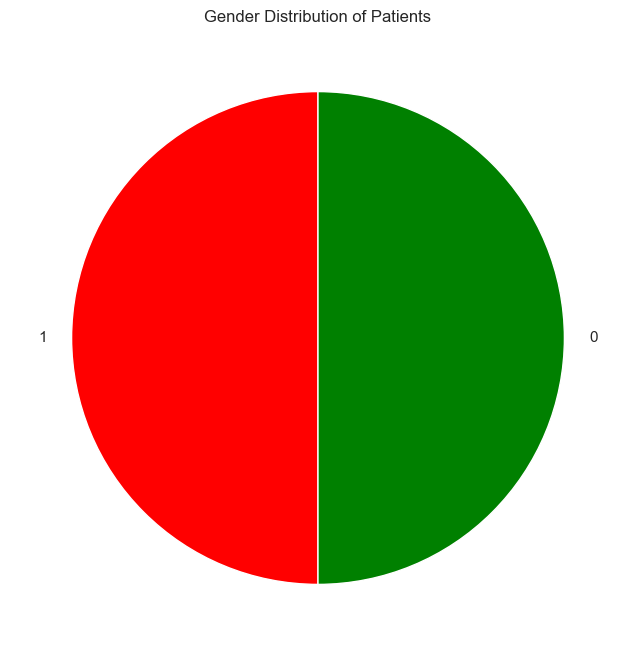

In [23]:
# Create pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, startangle=90, colors=['red', 'green'])
plt.title('Gender Distribution of Patients')
plt.show()

# Box Plots

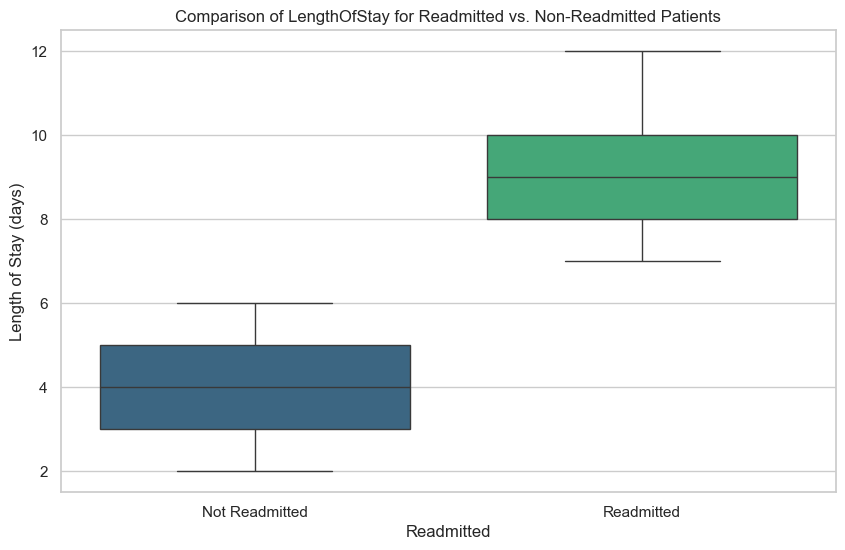

In [24]:
# Create box plot for LengthOfStay by Readmitted status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Readmitted', y='LengthOfStay (in days)', data=df, palette='viridis')
plt.title('Comparison of LengthOfStay for Readmitted vs. Non-Readmitted Patients')
plt.xlabel('Readmitted')
plt.ylabel('Length of Stay (days)')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()

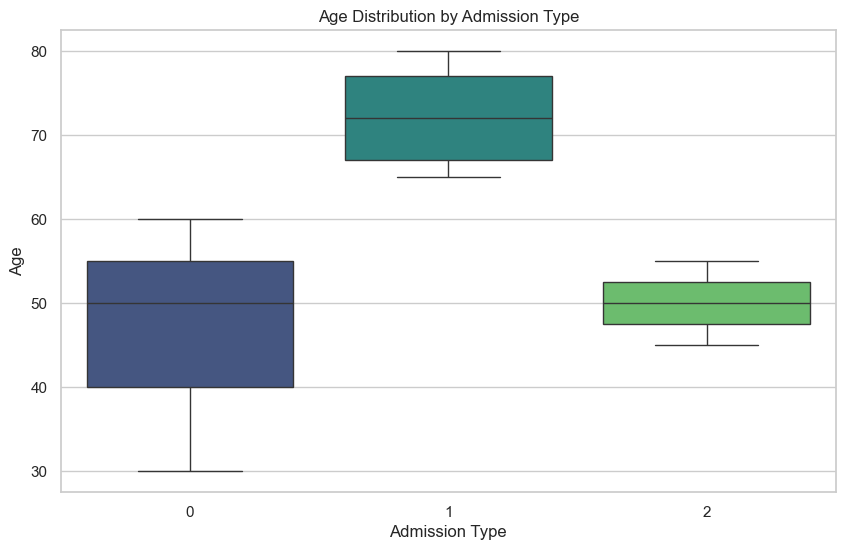

In [25]:
# Create box plot for Age by AdmissionType
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdmissionType', y='Age (in years)', data=df, palette='viridis')
plt.title('Age Distribution by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Age')
plt.show()

# Heatmaps

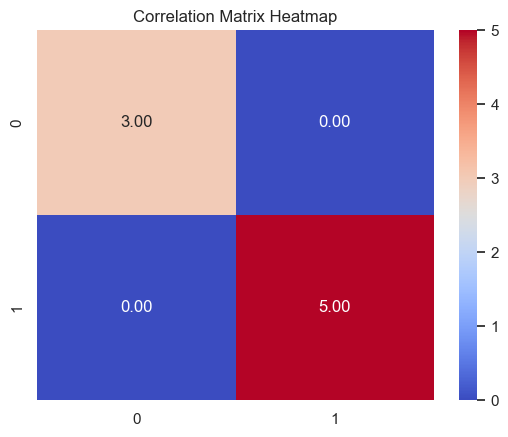

In [26]:
# Calculate correlation matrix
sns.heatmap(cm, annot=True,fmt='.2f', cmap='coolwarm',)
plt.title('Correlation Matrix Heatmap')
plt.show()

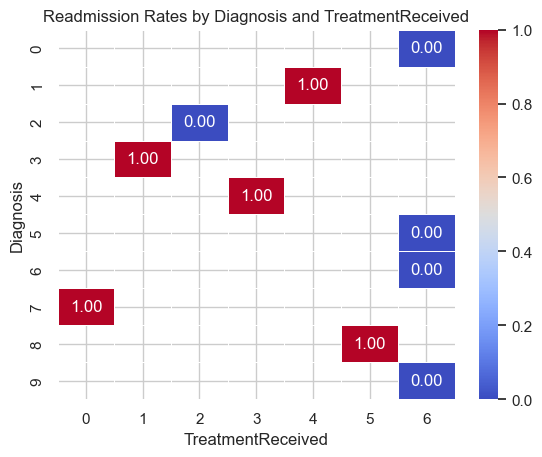

In [27]:
# Draw the heatmap with the readmission rates
readmission_rates = df.groupby(['Diagnosis', 'TreatmentReceived'])['Readmitted'].mean().unstack()
sns.heatmap(readmission_rates, annot=True, fmt='.2f', cmap='coolwarm', vmin=0, vmax=1, linewidths=.5)
plt.title('Readmission Rates by Diagnosis and TreatmentReceived')
plt.ylabel('Diagnosis')
plt.xlabel('TreatmentReceived')
plt.show()

# Scatter plots

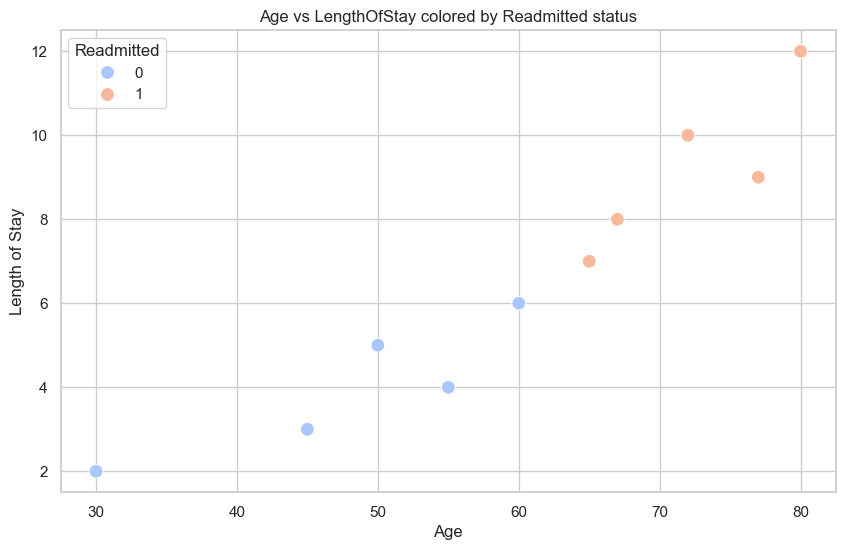

In [28]:
# Plot Age against LengthOfStay, colored by Readmitted status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age (in years)', y='LengthOfStay (in days)', hue='Readmitted', palette='coolwarm', s=100)
plt.title('Age vs LengthOfStay colored by Readmitted status')
plt.xlabel('Age')
plt.ylabel('Length of Stay')
plt.legend(title='Readmitted')
plt.show()

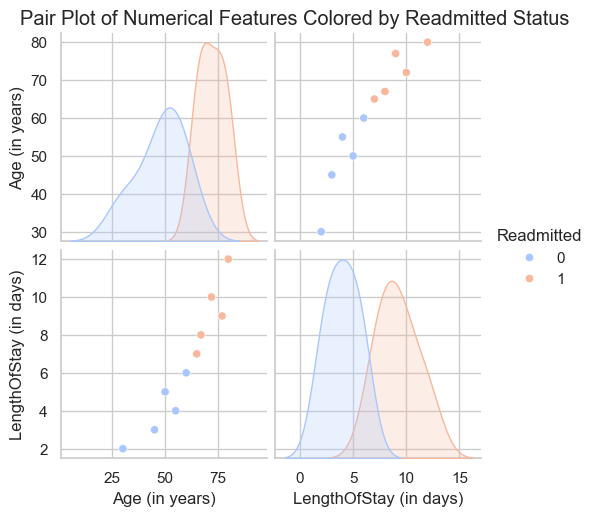

In [29]:
# Select only the numerical features for the pair plot
numerical_features = df[['Age (in years)', 'LengthOfStay (in days)']]

# Add the 'Readmitted' column to the numerical features for hue
numerical_features['Readmitted'] = df['Readmitted']

# Create the pair plot
sns.pairplot(numerical_features, hue='Readmitted', palette='coolwarm')
plt.suptitle('Pair Plot of Numerical Features Colored by Readmitted Status', y=1.02)
plt.show()

# Q 1). What are the potential applications of healthcare data for predicting patient readmissions? Explain by giving a workflow example. Write a 750-word essay.

# Q 2). How can this model be developed into an algorithm? Give examples of workflow for this approach. Explain the benefits of this approach.

# Q 3). How can this model be developed into a standalone application? Give examples of workflow for this approach. Explain the benefits of this approach.

# Q 4). How can we commercially deploy this model as a SAAS model?